In [14]:
import kagglehub
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline

## Load the dataset
url = "https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv"

try:
    df = pd.read_csv(url)
    print("Success! Data loaded successfully.")
except Exception as e:
    print(f"Error loading data: {e}")

## Display first few rows
print("\n Data Preview")
print(df.head())

Success! Data loaded successfully.

 Data Preview
   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


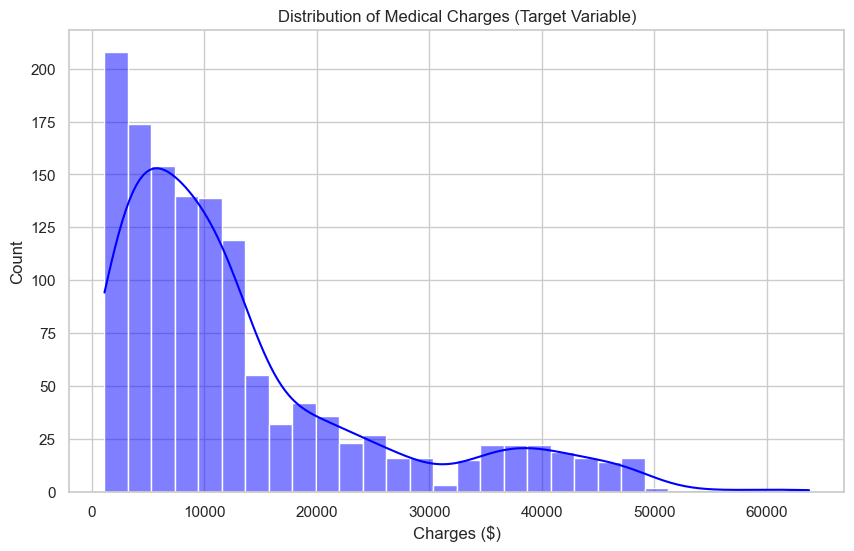

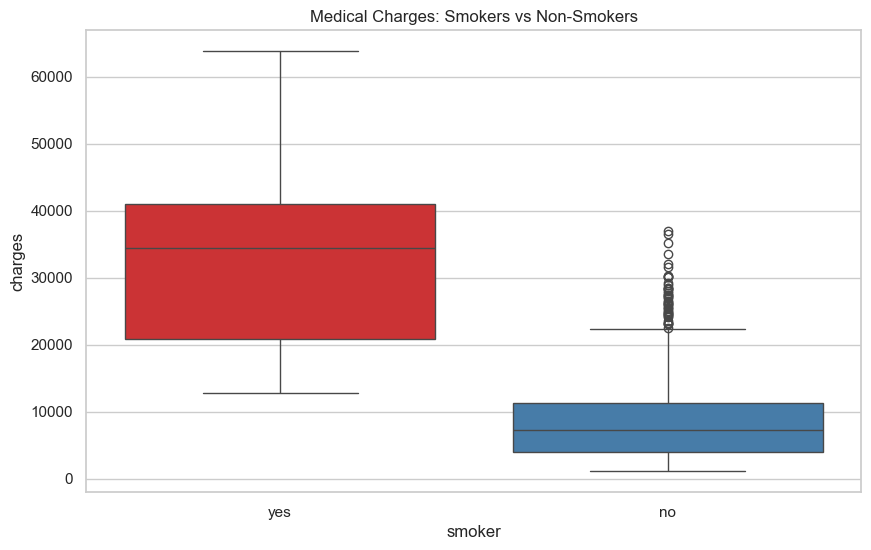

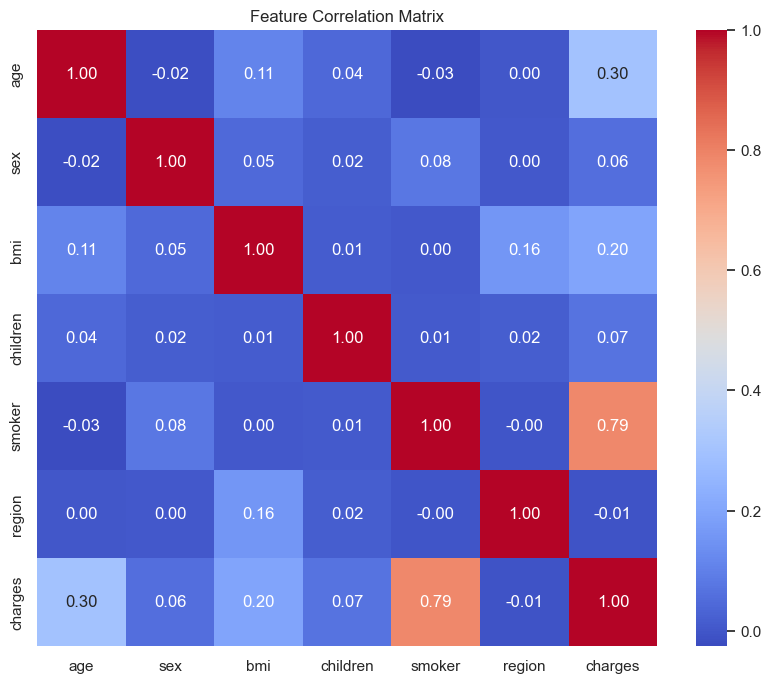

In [26]:
## Graphs and visuals
sns.set(style="whitegrid")

# Graph 1: Distribution of Medical Charges (The Target)
plt.figure(figsize=(10, 6))
sns.histplot(df['charges'], kde=True, color='blue')
plt.title('Distribution of Medical Charges (Target Variable)')
plt.xlabel('Charges ($)')
plt.show()

## Graph 2: Smoker vs Charges
plt.figure(figsize=(10, 6))
sns.boxplot(x='smoker', y='charges', data=df, palette='Set1', hue='smoker', legend=False)
plt.title('Medical Charges: Smokers vs Non-Smokers')
plt.show()

## Graph 3: Correlation Matrix
## We temporarily encode categorical data just for this heatmap
df_heatmap = df.copy()
for col in ['sex', 'smoker', 'region']:
    df_heatmap[col] = df_heatmap[col].astype('category').cat.codes

plt.figure(figsize=(10, 8))
sns.heatmap(df_heatmap.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Feature Correlation Matrix')
plt.show()

In [28]:
## PREPROCESSING (ONE-HOT ENCODING)
df_encoded = pd.get_dummies(df, columns=['sex', 'smoker', 'region'], drop_first=True)

print("Processed Data (First 5 Rows)")
print(df_encoded.head())

Processed Data (First 5 Rows)
   age     bmi  children      charges  sex_male  smoker_yes  region_northwest  \
0   19  27.900         0  16884.92400     False        True             False   
1   18  33.770         1   1725.55230      True       False             False   
2   28  33.000         3   4449.46200      True       False             False   
3   33  22.705         0  21984.47061      True       False              True   
4   32  28.880         0   3866.85520      True       False              True   

   region_southeast  region_southwest  
0             False              True  
1              True             False  
2              True             False  
3             False             False  
4             False             False  


In [30]:
## Trainning and testing split
X = df_encoded.drop('charges', axis=1) 
y = df_encoded['charges'] 

print("X" , X)
print("Y" , y)

# Splitting 80% for training, 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X       age     bmi  children  sex_male  smoker_yes  region_northwest  \
0      19  27.900         0     False        True             False   
1      18  33.770         1      True       False             False   
2      28  33.000         3      True       False             False   
3      33  22.705         0      True       False              True   
4      32  28.880         0      True       False              True   
...   ...     ...       ...       ...         ...               ...   
1333   50  30.970         3      True       False              True   
1334   18  31.920         0     False       False             False   
1335   18  36.850         0     False       False             False   
1336   21  25.800         0     False       False             False   
1337   61  29.070         0     False        True              True   

      region_southeast  region_southwest  
0                False              True  
1                 True             False  
2               


 Model Performance
R-Squared Score: 0.7836 (Accuracy: 78.36%)
RMSE: $5796.28 (Average prediction error in dollars)


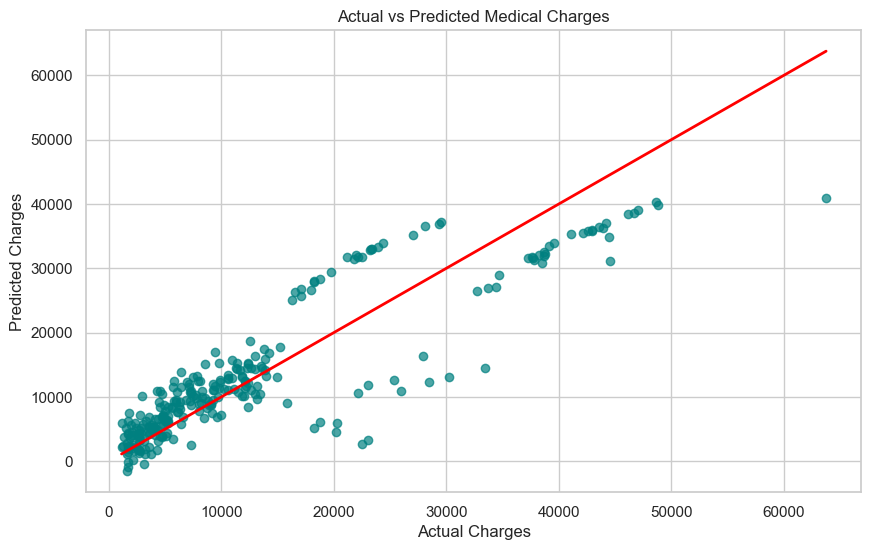

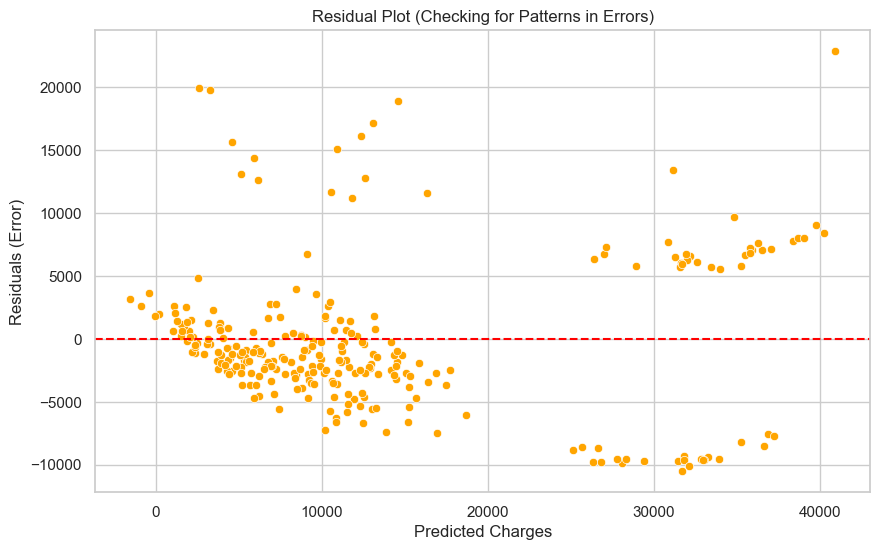

In [32]:
## Model traning
model = LinearRegression()
model.fit(X_train, y_train)

## Evaluation and visualization
y_pred = model.predict(X_test)

## Metrics
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"\n Model Performance")
print(f"R-Squared Score: {r2:.4f} (Accuracy: {r2*100:.2f}%)")
print(f"RMSE: ${rmse:.2f} (Average prediction error in dollars)")

## Graph 4: Actual vs Predicted Prices
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='teal')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.title('Actual vs Predicted Medical Charges')
plt.show()

## Graph 5: Residuals (Errors)
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred, y=residuals, color='orange')
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Charges')
plt.ylabel('Residuals (Error)')
plt.title('Residual Plot (Checking for Patterns in Errors)')
plt.show()

Training via Gradient Descent...
Linear regression with gradient method
R-Squared Score : 0.8613 (Accuracy: 86.13%)
RMSE (Error)    : $4640.15


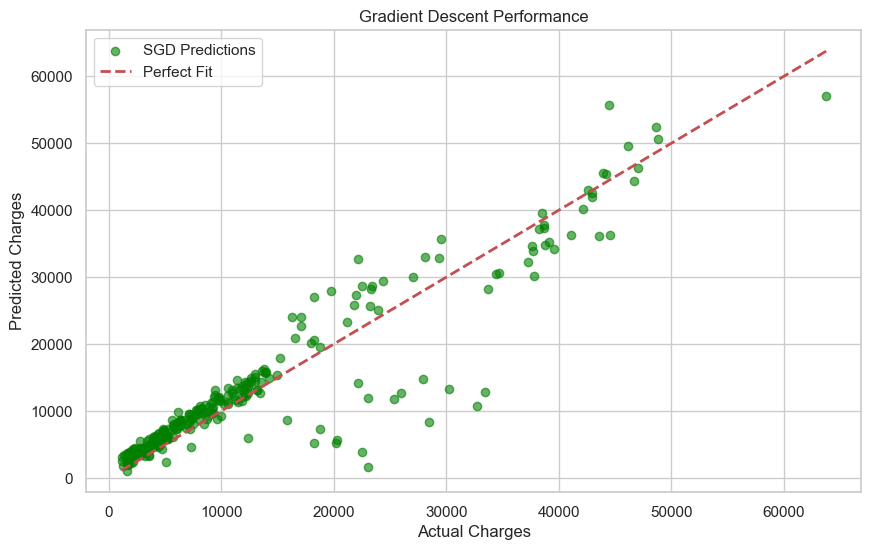

In [33]:
## Linear regression with gradient method
pipeline = Pipeline([
    ('poly', PolynomialFeatures(degree=2)), 
    ('scaler', StandardScaler()),           
    ('sgd', SGDRegressor(
        max_iter=10000,     
        tol=1e-3,          
        penalty=None,       
        eta0=0.01,          
        random_state=42
    ))
])

## Train the model
print("Training via Gradient Descent...")
pipeline.fit(X_train, y_train)

## Evaluation
y_pred = pipeline.predict(X_test)

r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("Linear regression with gradient method")
print(f"R-Squared Score : {r2:.4f} (Accuracy: {r2*100:.2f}%)")
print(f"RMSE (Error)    : ${rmse:.2f}")

## 5. Visulaziation
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='green', label='SGD Predictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Perfect Fit')
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.title('Gradient Descent Performance')
plt.legend()
plt.show()